<a href="https://colab.research.google.com/github/bayhaqy/X-Dashboard/blob/main/X_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# X-Dashboard
https://github.com/bayhaqy/X-Dashboard

## Input on Google Colab

### Import Library

In [77]:
# Data Analysis and Profiling
import pandas as pd
from ydata_profiling import ProfileReport

# Streamlit for Building the Dashboard
import streamlit as st
from streamlit_pandas_profiling import st_profile_report

# Language Detection
from langdetect import detect

# NLP and Text Processing
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from deep_translator import GoogleTranslator
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup

# Sentiment Analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

# URL Parsing
from urllib.parse import urlparse

# Data Visualization
import plotly.express as px
import matplotlib.pyplot as plt

# Word Cloud Generation
from wordcloud import WordCloud

# Other Libraries
import torch
import requests
import subprocess
import logging
import json
import re
import os

# NLTK Data Download
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [78]:
!pip -q install streamlit streamlit_pandas_profiling ydata_profiling vaderSentiment textblob langdetect transformers deep_translator torch streamlit-ext

In [79]:
node_major_version = int(subprocess.check_output(['node', '-v']).decode("utf-8").split('.')[0][1:])
node_major_version

20

In [80]:
# Import required Python package
!pip install pandas

# Install Node.js (because tweet-harvest built using Node.js)
!sudo apt-get update
!sudo apt-get install -y ca-certificates curl gnupg
!sudo mkdir -p /etc/apt/keyrings
!curl -fsSL https://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor -o /etc/apt/keyrings/nodesource.gpg

!NODE_MAJOR=20 && echo "deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_$NODE_MAJOR.x nodistro main" | sudo tee /etc/apt/sources.list.d/nodesource.list

!sudo apt-get update
!sudo apt-get install nodejs -y

!node -v

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://deb.nodesource.com/node_20.x nodistro InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 233 kB in 1s (164 kB/s)
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ca-certificates

In [81]:
ls

app.py      LICENSE        package.json       README.md         scripts/           tweets-data/
Dockerfile  node_modules/  package-lock.json  requirements.txt  tweet_harvest.log


In [82]:
%%writefile scripts/setup.sh
#!/bin/bash

sudo apt-get update
sudo apt-get install -y ca-certificates curl gnupg
sudo mkdir -p /etc/apt/keyrings
curl -fsSL https://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor -o /etc/apt/keyrings/nodesource.gpg

NODE_MAJOR=20 && echo "deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_$NODE_MAJOR.x nodistro main" | sudo tee /etc/apt/sources.list.d/nodesource.list

sudo apt-get update
sudo apt-get install nodejs npm -y

sudo npm i -g tweet-harvest@latest

Overwriting scripts/setup.sh


In [83]:
def init_check():
    # check for google-chrome
    if os.system("node -v") != 0:
        print("Google Chrome is not installed")
        if os.path.exists("scripts/setup.sh"):
            print("Trying to install node.js")
            os.system("bash scripts/setup.sh")

    if os.system("npm --version") != 0:
        print("npm is not installed")

    if os.system("npx --version") != 0:
        print("npx is not installed")

init_check()

### Define Function

In [84]:
required_libraries = ["pandas"]  # Replace with your list of required libraries

# Function to check and install libraries
def check_install_libraries(lib_list):
    for library in lib_list:
        try:
            __import__(library)
            print(f"{library} is already installed.")
        except ImportError:
            print(f"{library} is not installed. Installing...")
            try:
                subprocess.check_call(["pip", "install", library])
                print(f"{library} installed successfully.")
            except subprocess.CalledProcessError as e:
                print(f"Install {library} failed with return code {e.returncode}.")
            except Exception as ex:
                print(f"An error occurred while installing {library}: {ex}")

# Function to check and upgrade tweet-harvest
def check_upgrade_tweet_harvest():
    try:
        version_exist = subprocess.check_output(["npx", "tweet-harvest", "--version"], text=True)
        version_exist = version_exist.strip().split('\n')[-1]

        version_latest = subprocess.check_output(["npm", "show", "tweet-harvest", "version"], text=True).strip()

        if version_latest > version_exist:
            print("A newer version is available. Upgrading to the latest version...")
            try:
                subprocess.check_call(["npm", "install", "-g", "tweet-harvest@latest"])
                print("Tweet-harvest upgraded to the latest version.")
            except subprocess.CalledProcessError as e:
                print("Error occurred while upgrading tweet-harvest:", e)
        else:
            print("Tweet-harvest is already installed.")
            print("Tweet-harvest version:", version_exist)

    except subprocess.CalledProcessError:
        print("Tweet-harvest is not installed. Installing...")

        try:
            subprocess.check_call(["npm", "install", "tweet-harvest@latest", "-g"])
            print("Tweet-harvest installed successfully.")

            # Now, check the version
            result = subprocess.check_output(["npx", "tweet-harvest", "--version"], text=True)
            result = result.strip().split('\n')[-1]

            print("Tweet-harvest version:", result.strip())

        except subprocess.CalledProcessError as e:
            print("Error occurred while installing tweet-harvest:", e)
    except Exception as ex:
        print("An error occurred:", ex)

def remove_notif():
    dir_bin = '/usr/lib/node_modules/tweet-harvest/dist/bin.js'
    subprocess.check_call(f"sed -i '/console.log(/d' {dir_bin}", shell=True)
    subprocess.check_call(f"sed -i '/npm i @playwright/d' {dir_bin}", shell=True)
    subprocess.check_call(f"sed -i '/npx playwright install chromium/d' {dir_bin}", shell=True)

def check_help():
    print('Check Help for tweet-harvest')
    command = f'npx --yes tweet-harvest -h'
    try:
        result = subprocess.run(command, shell=True, capture_output=True, text=True, check=True)
        print("Command executed successfully.")
        print(result.stdout)

    except subprocess.CalledProcessError as e:
        print("Error: The command returned a non-zero exit status.")
        print("Error message:", e)
        print("Standard output:", e.stdout)
        print("Standard error:", e.stderr)

# Function to run tweet-harvest
def run_tweet_harvest(b):
    search_keyword = search_keyword_input.value
    from_date = from_date_input.value
    to_date = to_date_input.value
    limit = limit_input.value
    delay = delay_input.value
    token = token_input.value

    # Run tweet-harvest with the provided parameters
    print('Check Tweet')
    command = f'npx --yes tweet-harvest -s "{search_keyword}" -f "{from_date}" -t "{to_date}" -l {limit} -d {delay} --token "{token}" -o "{filename}"'
    #with tqdm(total=100, file=sys.stderr, unit="step") as pbar:  # Create a progress bar
    try:
        result = subprocess.run(command, shell=True, capture_output=True, text=True, check=True)
        # pbar.update(100)  # Update the progress bar to 100% when the command is finished
        print("Command executed successfully.")
        print(result.stdout)  # Display the standard output, give comment if you don't want to see
    except subprocess.CalledProcessError as e:
        #pbar.update(100)  # Update the progress bar to 100% in case of an error
        print("Error: The command returned a non-zero exit status.")
        print("Error message:", e)
        print("Standard output:", e.stdout)
        print("Standard error:", e.stderr)

In [186]:
## ............................................... ##
# Function to install Node.js
def install_nodejs():
    try:
        # Check if Node.js is already installed by attempting to get its version.
        node_major_version = int(subprocess.check_output(['node', '-v']).decode("utf-8").split('.')[0][1:])
    except FileNotFoundError:
        # If 'node' command is not found, it means Node.js is not installed.
        node_major_version = 0

    if node_major_version < 20:
        print('Update OS')
        subprocess.check_call(['sudo', 'apt-get', 'update'])

        print('Download Files Requirement for Nodesource')
        subprocess.check_call(['sudo', 'apt-get', 'install', '-y', 'ca-certificates', 'curl', 'gnupg'])
        subprocess.check_call(['sudo', 'mkdir', '-p', '/etc/apt/keyrings'])
        subprocess.check_call(f'curl -fsSL https://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor -o /etc/apt/keyrings/nodesource.gpg', shell=True)

        NODE_MAJOR = 20
        node_source_entry = f"deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_{NODE_MAJOR}.x nodistro main"
        subprocess.check_call(f'echo "{node_source_entry}" | sudo tee /etc/apt/sources.list.d/nodesource.list', shell=True)

        print('Install Node.js')
        subprocess.check_call(['sudo', 'apt-get', 'update'])
        subprocess.check_call(['sudo', 'apt-get', 'install', 'nodejs', '-y'])

        result = subprocess.check_output(['node', '-v']).decode("utf-8")
        print(f'Node.js version: {result}')
    else:
        print('Node.js version already installed')
        result = subprocess.check_output(['node', '-v']).decode("utf-8")
        print(f'Node.js version already updated to {result}')

## ............................................... ##
# Function to run tweet-harvest
def run_X_scrapping(search_keyword,from_date,to_date,limit,delay,token,filename):
    # Run scraping with the provided parameters
    #st.markdown('Check Tweet')
    command = f'npx --yes tweet-harvest -s "{search_keyword}" -f "{from_date}" -t "{to_date}" -l {limit} -d {delay} --token "{token}" -o "{filename}"'
    try:
        result = subprocess.run(command, shell=True, capture_output=True, text=True, check=True)
        with st.expander("Scrapping Logs"):
            print("Command executed successfully.")
            print(result.stdout)  # Display the standard output, give comment if you don't want to see
    except subprocess.CalledProcessError as e:
        with st.expander("Scrapping Logs"):
            print("Error: The command returned a non-zero exit status.")
            print("Error message:", e)
            print(f'Standard output: {e.stdout}')
            print(f'Standard error: {e.stderr}')

## ............................................... ##
# Function for get model and tokenize
def get_models_and_tokenizers():
    tokenizer = AutoTokenizer.from_pretrained(model_name, token = HF_TOKEN)
    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2, token = HF_TOKEN)
    #model.eval()

    return model, tokenizer

## ............................................... ##
# Function for sentiment analysis
def analyze_sentiment_distilbert(text, _model, _tokenizer):
    try:
        tokens_info = _tokenizer(text, truncation=True, return_tensors="pt")
        with torch.no_grad():
            raw_predictions = _model(**tokens_info).logits

        predicted_class_id = raw_predictions.argmax().item()
        predict = _model.config.id2label[predicted_class_id]

        softmaxed = int(torch.nn.functional.softmax(raw_predictions[0], dim=0)[1] * 100)
        if (softmaxed > 70):
            status = 'Not trust'
        elif (softmaxed > 40):
            status = 'Not sure'
        else:
            status = 'Trust'
        return status, predict

    except Exception as e:
        print(f"Sentiment analysis error: {str(e)}")
        return 'N/A', 'N/A'

## ............................................... ##
# Function for sentiment analysis using VADER
def analyze_sentiment_vader(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment = analyzer.polarity_scores(text)
    compound_score = sentiment['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

## ............................................... ##
# Function for sentiment analysis using TextBlob
def analyze_sentiment_textblob(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

## ............................................... ##
# Function for translation
def translate_text(text, source='auto', target='en'):
    try:
        if source != target:
            text = GoogleTranslator(source=source, target=target).translate(text)
        return text

    except Exception as e:
        logging.error(f"Translation error: {str(e)}")
        return text

## ............................................... ##
# Function for language detection with try-except
def detect_language(text):
    try:
        result = detect(text)
        return result
    except:
        remove_emojis = re.sub(r'[^\w\s]', '', text)
        result = detect(remove_emojis)
        return result

## ............................................... ##
# Function for Load and Transform Data
def selection_data(filename):
    file_path = f"tweets-data/{filename}"
    df = pd.read_csv(file_path, delimiter=",")

    # Rename columns
    column_mapping = {
        'created_at': 'Created Date',
        'user_id_str': 'User ID',
        'username': 'Username',
        'full_text': 'Tweet',
        'tweet_url': 'Tweet URL',
        'id_str': 'Tweet ID',
        'conversation_id_str': 'Conversation ID',
        'lang': 'App Language',
        'quote_count': 'Quote Count',
        'reply_count': 'Reply Count',
        'retweet_count': 'Retweet Count',
        'favorite_count': 'Favorite Count',
    }
    df = df.rename(columns=column_mapping)

    # Drop rows where 'Tweet' is null
    df.dropna(subset=['Tweet'], inplace=True)

    # Add a new column for detected language
    df['Detect Language'] = df['Tweet'].apply(lambda tweet: detect_language(tweet))

    # Mapping language codes to country names
    language_to_country = {
        'af': 'South Africa',
        'ar': 'Arabic',
        'bg': 'Bulgaria',
        'bn': 'Bangladesh',
        'ca': 'Catalan',
        'cs': 'Czech',
        'cy': 'Welsh',
        'da': 'Danish',
        'de': 'German',
        'el': 'Greek',
        'en': 'English',
        'es': 'Spanish',
        'et': 'Estonian',
        'fa': 'Persian',
        'fi': 'Finnish',
        'fr': 'French',
        'gu': 'Gujarati',
        'he': 'Hebrew',
        'hi': 'Hindi',
        'hr': 'Croatian',
        'hu': 'Hungarian',
        'id': 'Indonesian',
        'it': 'Italian',
        'ja': 'Japanese',
        'kn': 'Kannada',
        'ko': 'Korean',
        'lt': 'Lithuanian',
        'lv': 'Latvian',
        'mk': 'Macedonian',
        'ml': 'Malayalam',
        'mr': 'Marathi',
        'ne': 'Nepali',
        'nl': 'Dutch',
        'no': 'Norwegian',
        'pa': 'Punjabi',
        'pl': 'Polish',
        'pt': 'Portuguese',
        'ro': 'Romanian',
        'ru': 'Russian',
        'sk': 'Slovak',
        'sl': 'Slovenian',
        'so': 'Somali',
        'sq': 'Albanian',
        'sv': 'Swedish',
        'sw': 'Swahili',
        'ta': 'Tamil',
        'te': 'Telugu',
        'th': 'Thai',
        'tl': 'Tagalog',
        'tr': 'Turkish',
        'uk': 'Ukrainian',
        'ur': 'Urdu',
        'vi': 'Vietnamese',
        'zh-cn': 'Simplified Chinese',
        'zh-tw': 'Traditional Chinese'
    }

    # Add 'Country' column to df
    df['Language'] = df['Detect Language'].map(language_to_country)

    # Sort columns
    desired_columns = ['Created Date', 'User ID', 'Username', 'Tweet', 'Language', 'Detect Language', 'App Language', 'Tweet URL', 'Tweet ID', 'Conversation ID', 'Quote Count', 'Reply Count', 'Retweet Count', 'Favorite Count']
    df = df[desired_columns]

    # Set data types
    data_types = {
        'Created Date': 'datetime64[ns]',
        'User ID': 'int64',
        'Username': 'object',
        'Tweet': 'object',
        'Language': 'object',
        'Detect Language': 'object',
        'App Language': 'object',
        'Tweet URL': 'object',
        'Tweet ID': 'int64',
        'Conversation ID': 'int64',
        'Quote Count': 'int64',
        'Reply Count': 'int64',
        'Retweet Count': 'int64',
        'Favorite Count': 'int64',
    }
    df = df.astype(data_types)

    # Reset the index to add the date column
    df.reset_index(inplace=True,drop=True)

    return df

## ............................................... ##
# Function to preprocess the data
def preprocessing_data(df):
    # Remove duplicates
    df = df.drop_duplicates(subset='Translation')

    # Reset the index to add the date column
    df.reset_index(inplace=True,drop=True)

    # Function to clean and preprocess text
    def clean_text(text):
        # Remove mentions (e.g., @username)
        text = re.sub(r'@[\w]+', '', text)

        # Remove URLs
        text = re.sub(r'http\S+', '', text)

        # Remove HTML tags
        text = BeautifulSoup(text, 'html.parser').get_text()

        # Convert to lowercase
        text = text.lower()

        # Remove non-alphanumeric characters
        # text = re.sub(r'[^a-zA-Z\s]', '', text)

        # Tokenize text
        # words = nltk.word_tokenize(text)

        # Remove stopwords
        # stop_words = set(stopwords.words('english'))
        # words = [word for word in words if word not in stop_words]

        # Lemmatize words
        # lemmatizer = WordNetLemmatizer()
        # words = [lemmatizer.lemmatize(word) for word in words]
        # text = ' '.join(words)

        return text

    # Apply the clean_text function to the "Translation" column
    df['Cleaned Translation'] = df['Translation'].apply(clean_text)

    return df

## ............................................... ##
# Function to create a Word Cloud
def create_wordcloud(df):
    # Combine all text
    text = ' '.join(df['Cleaned Translation'])

    # Create a Word Cloud
    wordcloud = WordCloud(width=700, height=400, max_words=50).generate(text)

    # Display the Word Cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    st.pyplot()
    plt.show()

## ............................................... ##
# IMPORTANT: Cache the conversion to prevent computation on every rerun
def convert_df(df):
    return df.to_csv().encode('utf-8')

### Scraping Data

#### Input with widget

In [86]:
import ipywidgets as widgets
import tqdm
import sys

# Create input widgets
print('Input text')
search_keyword_input = widgets.Text(placeholder="Enter search keyword", description="Search Keyword:")
from_date_input = widgets.Text(placeholder="YYYY-MM-DD", description="From:")
to_date_input = widgets.Text(placeholder="YYYY-MM-DD", description="To:")
limit_input = widgets.IntText(placeholder="Enter limit", description="Limit:",value=10)
delay_input = widgets.IntText(placeholder="Enter delay in seconds", description="Delay:",value=3)
token_input = widgets.Password(placeholder="Enter your Twitter API token", description="Token:")

filename = 'tweets_data.csv'

# Call functions to check and install libraries, Node.js, and tweet-harvest
check_install_libraries(required_libraries)
install_nodejs()
check_upgrade_tweet_harvest()

# Check Help
#check_help()

# Remove Notification and Update tweet-harvest
#remove_notif()

# Create a button to trigger tweet-harvest
submit_button = widgets.Button(description="Submit")
submit_button.on_click(run_tweet_harvest)

# Display the input widgets and submit button
display(search_keyword_input, from_date_input, to_date_input, limit_input, delay_input, token_input, submit_button)

Input text
pandas is already installed.
Node.js version already installed
Node.js version already updated to v20.10.0

Tweet-harvest is already installed.
Tweet-harvest version: 2.4.2


Text(value='', description='Search Keyword:', placeholder='Enter search keyword')

Text(value='', description='From:', placeholder='YYYY-MM-DD')

Text(value='', description='To:', placeholder='YYYY-MM-DD')

IntText(value=10, description='Limit:')

IntText(value=3, description='Delay:')

Password(description='Token:', placeholder='Enter your Twitter API token')

Button(description='Submit', style=ButtonStyle())

Check Tweet
Command executed successfully.

Welcome to the Twitter Crawler 🕷️

This script uses Chromium Browser to crawl data from Twitter with *your* Twitter auth token.
Please enter your Twitter auth token when prompted.

Note: Keep your access token secret! Don't share it with anyone else.
Note: This script only runs on your local device.


up to date, audited 4 packages in 978ms

found 0 vulnerabilities
Installing dependencies...
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 https://deb.nodesource.com/node_20.x nodistro InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
H

#### Input with set variable

In [87]:
# Crawl Data

search_keyword = 'Palestine israel'
from_date = "01-01-2023"
to_date = "06-01-2024"
limit = 100
delay = 3
token = ""
filename = 'tweets_data.csv'
HF_TOKEN = ''
model_name = 'distilbert-base-uncased-finetuned-sst-2-english'

install_nodejs()

run_X_scrapping(search_keyword,from_date,to_date,limit,delay,token,filename)

Node.js version already installed
Node.js version already updated to v20.10.0

Command executed successfully.

Welcome to the Twitter Crawler 🕷️

This script uses Chromium Browser to crawl data from Twitter with *your* Twitter auth token.
Please enter your Twitter auth token when prompted.

Note: Keep your access token secret! Don't share it with anyone else.
Note: This script only runs on your local device.


up to date, audited 4 packages in 580ms

found 0 vulnerabilities
Installing dependencies...
Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 https://deb.nodesource.com/node_20.x nodistro InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:8 https://ppa

#### Check results

In [153]:
!tail tweets-data/tweets_data.csv

"Fri Dec 29 17:19:20 +0000 2023","1740784579492159610","Israel wants us to stop talking about Gaza  to become desensitized by the horrors of the ongoing genocide. But we must not allow this to happen. This is why. #Gaza #Israel #Palestine #Biden_is_a_war_criminal #Gaza_Genocide https://t.co/tPZFp1APF7","3","4","6","12","en","1583176417914851333","1740784579492159610","VideoSurge365","https://twitter.com/VideoSurge365/status/1740784579492159610","https://pbs.twimg.com/ext_tw_video_thumb/1740784498726305792/pu/img/TnTnRfAE-K9WT0yw.jpg","Paris, France"
"Fri Dec 29 15:05:41 +0000 2023","1740750943883604305","@StopZionistHate never existed? Palestine have longer history than Israel  even my grandma is older than Israel","2","230","205","4426","en","1627573846315507712","1740750529054027807","WR_Samurai","https://twitter.com/WR_Samurai/status/1740750943883604305","","Rabbit Hole, Mars🕳️"
"Fri Dec 29 07:59:44 +0000 2023","1740643752182796327","When your entire existence is justified by a lie 

### Data Preprocessing

In [188]:
filename = 'tweets_data.csv'

df = selection_data(filename)
df.head()

,Created Date,User ID,Username,Tweet,Language,Detect Language,App Language,Tweet URL,Tweet ID,Conversation ID,Quote Count,Reply Count,Retweet Count,Favorite Count
0,2023-12-29 17:54:18,776528756,omarsuleiman504,South Africa the nation of Nelson Mandela on...,English,en,en,https://twitter.com/omarsuleiman504/status/174...,1740793377338380727,1740793377338380727,470,937,14694,35045
1,2023-12-29 15:11:17,801203059359678464,DrEliDavid,Queers 🏳️‍🌈 Queers 🏳️‍🌈 ...,English,en,en,https://twitter.com/DrEliDavid/status/17407523...,1740752353089954124,1740752353089954124,231,1748,4529,22707
2,2023-12-29 16:42:05,486027045,LuxJude352,Much debate over “From the river to the sea P...,English,en,en,https://twitter.com/LuxJude352/status/17407752...,1740775203649773774,1740775203649773774,3,2,21,26
3,2023-12-29 13:50:40,1650353578697977856,Somebod91246524,Palestine and Israel bombing eachother #livele...,English,en,en,https://twitter.com/Somebod91246524/status/174...,1740732065442865463,1740732065442865463,0,1,2,42
4,2023-12-29 20:29:54,4624133423,salaamedia,#Palestine | [ WATCH 🎥] As the government of S...,English,en,en,https://twitter.com/salaamedia/status/17408325...,1740832537679696212,1740832537679696212,4,5,27,56


In [190]:
# Initialize model and tokenizer
model, tokenizer = get_models_and_tokenizers()

# Conditionally apply translation function to the 'Translation' column
df['Translation'] = df.apply(lambda row: translate_text((row['Tweet']), source=row['Detect Language'], target='en'), axis=1)

# Preprocessing result of Translation to dataframe
df = preprocessing_data(df)

<ipython-input-186-83d770d1d950>:271: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


In [192]:
# Conditionally apply VADER sentiment analysis to the 'Translation' column
df['Sentiment VADER'] = df['Translation'].apply(analyze_sentiment_vader)

# Conditionally apply TextBlob sentiment analysis to the 'Translation' column
df['Sentiment TextBlob'] = df['Translation'].apply(analyze_sentiment_textblob)

# Conditionally apply sentiment analysis function to the 'Translation' column
df[['Fake Check', 'Sentiment Distilbert']] = df['Translation'].apply(lambda text: pd.Series(analyze_sentiment_distilbert(text, model, tokenizer))).apply(lambda x: x.str.title())

In [191]:
df

,Created Date,User ID,Username,Tweet,Language,Detect Language,App Language,Tweet URL,Tweet ID,Conversation ID,Quote Count,Reply Count,Retweet Count,Favorite Count,Translation,Cleaned Translation
0,2023-12-29 17:54:18,776528756,omarsuleiman504,South Africa the nation of Nelson Mandela on...,English,en,en,https://twitter.com/omarsuleiman504/status/174...,1740793377338380727,1740793377338380727,470,937,14694,35045,South Africa the nation of Nelson Mandela on...,south africa the nation of nelson mandela on...
1,2023-12-29 15:11:17,801203059359678464,DrEliDavid,Queers 🏳️‍🌈 Queers 🏳️‍🌈 ...,English,en,en,https://twitter.com/DrEliDavid/status/17407523...,1740752353089954124,1740752353089954124,231,1748,4529,22707,Queers 🏳️‍🌈 Queers 🏳️‍🌈 ...,queers 🏳️‍🌈 queers 🏳️‍🌈 ...
2,2023-12-29 16:42:05,486027045,LuxJude352,Much debate over “From the river to the sea P...,English,en,en,https://twitter.com/LuxJude352/status/17407752...,1740775203649773774,1740775203649773774,3,2,21,26,Much debate over “From the river to the sea P...,much debate over “from the river to the sea p...
3,2023-12-29 13:50:40,1650353578697977856,Somebod91246524,Palestine and Israel bombing eachother #livele...,English,en,en,https://twitter.com/Somebod91246524/status/174...,1740732065442865463,1740732065442865463,0,1,2,42,Palestine and Israel bombing eachother #livele...,palestine and israel bombing eachother #livele...
4,2023-12-29 20:29:54,4624133423,salaamedia,#Palestine | [ WATCH 🎥] As the government of S...,English,en,en,https://twitter.com/salaamedia/status/17408325...,1740832537679696212,1740832537679696212,4,5,27,56,#Palestine | [ WATCH 🎥] As the government of S...,#palestine | [ watch 🎥] as the government of s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,2023-12-29 17:17:14,1240967950666010624,reyhan80975468,Where are United Nations and Human Rights Watc...,English,en,en,https://twitter.com/reyhan80975468/status/1740...,1740784052020629939,1740784052020629939,0,0,5,15,Where are United Nations and Human Rights Watc...,where are united nations and human rights watc...
115,2023-12-29 15:13:20,978989460,HipsterUnionRep,A tale of two Jakes. Q: Why has the UN passe...,English,en,en,https://twitter.com/HipsterUnionRep/status/174...,1740752871401071036,1740752871401071036,0,4,29,68,A tale of two Jakes. Q: Why has the UN passe...,a tale of two jakes. q: why has the un passe...
116,2023-12-29 21:44:29,951957279087190017,Shepherds4Good,The other day speaking to someone in the ment...,English,en,en,https://twitter.com/Shepherds4Good/status/1740...,1740851305571303843,1740851305571303843,11,5,432,1024,The other day speaking to someone in the ment...,the other day speaking to someone in the ment...
117,2023-12-29 21:49:00,1344081148926963712,MohFitX,🚨BREAKING: ISRAEL MASSACRES PALESTINIANS AFTER...,German,de,en,https://twitter.com/MohFitX/status/17408524414...,1740852441476927621,1740852441476927621,3,7,38,39,🚨Breaking: Israel Massacres Palestinians After...,🚨breaking: israel massacres palestinians after...


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Created Date          119 non-null    datetime64[ns]
 1   User ID               119 non-null    int64         
 2   Username              119 non-null    object        
 3   Tweet                 119 non-null    object        
 4   Language              119 non-null    object        
 5   Detect Language       119 non-null    object        
 6   App Language          119 non-null    object        
 7   Tweet URL             119 non-null    object        
 8   Tweet ID              119 non-null    int64         
 9   Conversation ID       119 non-null    int64         
 10  Quote Count           119 non-null    int64         
 11  Reply Count           119 non-null    int64         
 12  Retweet Count         119 non-null    int64         
 13  Favorite Count      

### Visualize Data

In [200]:
df_cache = df

## ............................................... ##
# Create a new column with a count of 1 for each tweet
df_date = pd.DataFrame(df_cache['Created Date'])
df_date['Tweet Count'] = 1

# Resample the data per second and calculate the count
data_resampled = df_date.resample('S', on='Created Date')['Tweet Count'].count().reset_index()
fig = px.line(data_resampled, x='Created Date', y='Tweet Count', title='Tweet Counts Over Time')
fig.update_layout(xaxis_rangeslider_visible=True)

fig.show()

In [201]:
FakeCheck_counts = df_cache['Fake Check'].value_counts().reset_index()
FakeCheck_counts.columns = ['Fake Check', 'Tweet Count']
fig = px.bar(FakeCheck_counts, x='Fake Check', y='Tweet Count', text='Tweet Count', title='Total Tweet by Fake Check')
fig.show()

In [210]:
## ............................................... ##
# Create a new column with a count of 1 for each tweet
df_date = pd.DataFrame(df_cache['Created Date'])
# df_date.set_index('Created Date', inplace=True)
df_date['Tweet Count'] = 1

# Resample the data per second and calculate the count
data_resampled = df_date.resample('S', on='Created Date')['Tweet Count'].count().reset_index()

# Create a time series plot with custom styling
fig = px.line(data_resampled, x='Created Date', y='Tweet Count', title='Tweet Counts Over Time')
fig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Tweet Count')
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

## ............................................... ##
# Create a DataFrame to count the number of tweets by language
language_counts = df_cache['Language'].value_counts().reset_index()
language_counts.columns = ['Language', 'Tweet Count']

# Create an attractive Plotly bar chart
fig = px.bar(language_counts, x='Language', y='Tweet Count', text='Tweet Count', title='Total Tweet by Language')
fig.update_xaxes(title_text='Language')
fig.update_yaxes(title_text='Total Tweet')
fig.show()

## ............................................... ##
# Group by Sentiment columns and get the count
try:
    sentiment_counts = df_cache[['Sentiment Distilbert', 'Sentiment VADER', 'Sentiment TextBlob']].apply(lambda x: x.value_counts()).T

    # Reset index to get Sentiment as a column
    sentiment_counts = sentiment_counts.reset_index()

    # Melt the DataFrame for easier plotting
    sentiment_counts = pd.melt(sentiment_counts, id_vars='index', var_name='Sentiment', value_name='Count')

    # Create the plot
    fig = px.bar(sentiment_counts, x='Sentiment', y='Count', color='index', barmode='group', title='Total Tweet per Sentiment')

    fig.show()

except Exception as e:
    print(f" Generate Report error : {str(e)}")

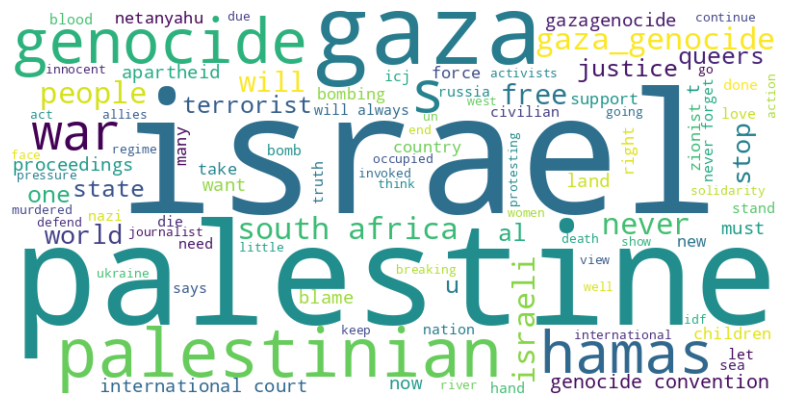

In [205]:
## ............................................... ##
# Function to create a Word Cloud
def create_wordcloud(df):
    # Combine all text
    text = ' '.join(df['Cleaned Translation'])

    # Create a Word Cloud
    wordcloud = WordCloud(width=800, height=400, max_words=100,
                              background_color='white',  # Set the background color
                              colormap='viridis'         # Set the color map
                          ).generate(text)

    # Display the Word Cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

create_wordcloud(df_cache)

In [206]:
## ............................................... ##
# Display processed data
print("Click the button below to download the processed data as a CSV file.")
# Show dataset information
pr = ProfileReport(df_cache)
pr

Click the button below to download the processed data as a CSV file.


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

AttributeError: 'NoneType' object has no attribute 'replace'

## Running on Streamlit

### Import Repository

In [1]:
!git clone https://github.com/bayhaqy/X-Dashboard.git

Cloning into 'X-Dashboard'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 27 (delta 8), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (27/27), 18.83 KiB | 3.14 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [7]:
cd X-Dashboard/

/content/X-Dashboard


In [8]:
!ls

app.py	Dockerfile  LICENSE  README.md	requirements.txt


### app.py

In [211]:
%%writefile app.py
# Data Analysis and Profiling
import pandas as pd
from ydata_profiling import ProfileReport
from st_aggrid import AgGrid

# Streamlit for Building the Dashboard
import streamlit as st
from streamlit_pandas_profiling import st_profile_report

# Language Detection
from langdetect import detect

# NLP and Text Processing
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from deep_translator import GoogleTranslator
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup

# Sentiment Analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

# URL Parsing
from urllib.parse import urlparse

# Data Visualization
import plotly.express as px
import matplotlib.pyplot as plt

# Word Cloud Generation
from wordcloud import WordCloud

# Other Libraries
import torch
import requests
import subprocess
import logging
import json
import re
import os

# NLTK Data Download
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

## ............................................... ##
# Function to install Node.js
@st.cache_data
def install_nodejs():
    st.sidebar.markdown('OS Information')
    result_OS = subprocess.check_output(['cat', '/etc/lsb-release']).decode("utf-8")
    st.sidebar.markdown(f'{result_OS}')

    st.sidebar.markdown('Python Information')
    result_PY = subprocess.check_output(['python3', '--version']).decode("utf-8")
    st.sidebar.markdown(f'{result_PY}')

    st.sidebar.markdown('IP Information')
    result_IP = subprocess.check_output(['curl', 'ipinfo.io']).decode("utf-8")
    # Parse the JSON string into a dictionary
    result_dict = json.loads(result_IP)

    # Iterate through the dictionary and print key-value pairs
    for key, value in result_dict.items():
        st.sidebar.markdown(f'{key} : {value}')

    try:
        # Check if Node.js is already installed by attempting to get its version.
        node_major_version = int(subprocess.check_output(['node', '-v']).decode("utf-8").split('.')[0][1:])
    except FileNotFoundError:
        # If 'node' command is not found, it means Node.js is not installed.
        node_major_version = 0

    if node_major_version < 20:
        st.sidebar.markdown('Update OS')
        subprocess.check_call(['sudo', 'apt-get', 'update'])

        st.sidebar.markdown('Download Files Requirement for Nodesource')
        subprocess.check_call(['sudo', 'apt-get', 'install', '-y', 'ca-certificates', 'curl', 'gnupg'])
        subprocess.check_call(['sudo', 'mkdir', '-p', '/etc/apt/keyrings'])
        subprocess.check_call(f'curl -fsSL https://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor -o /etc/apt/keyrings/nodesource.gpg', shell=True)

        NODE_MAJOR = 20
        node_source_entry = f"deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_{NODE_MAJOR}.x nodistro main"
        subprocess.check_call(f'echo "{node_source_entry}" | sudo tee /etc/apt/sources.list.d/nodesource.list', shell=True)

        st.sidebar.markdown('Install Node.js')
        subprocess.check_call(['sudo', 'apt-get', 'update'])
        subprocess.check_call(['sudo', 'apt-get', 'install', 'nodejs', '-y'])

        result = subprocess.check_output(['node', '-v']).decode("utf-8")
        st.sidebar.markdown(f'Node.js version: {result}')
    else:
        st.sidebar.markdown('Node.js version already installed')
        result = subprocess.check_output(['node', '-v']).decode("utf-8")
        st.sidebar.markdown(f'Node.js version already updated to {result}')

## ............................................... ##
# Function to run tweet-harvest
@st.cache_data
def run_X_scrapping(search_keyword,from_date,to_date,limit,delay,token,filename):
    with st.expander("Scrapping Logs"):
        # Run scraping with the provided parameters
        #st.markdown('Check Tweet')
        command = f'npx --yes tweet-harvest@latest -s "{search_keyword}" -f "{from_date}" -t "{to_date}" -l {limit} -d {delay} --token "{token}" -o "{filename}"'
        try:
            result = subprocess.run(command, shell=True, capture_output=True, text=True, check=True)
            st.markdown("Command executed successfully.")
            st.markdown(result.stdout)  # Display the standard output, give comment if you don't want to see
        except subprocess.CalledProcessError as e:
            st.markdown("Error: The command returned a non-zero exit status.")
            st.markdown("Error message:", e)
            st.markdown(f'Standard output: {e.stdout}')
            st.markdown(f'Standard error: {e.stderr}')

## ............................................... ##
# Function for get model and tokenize
@st.cache_resource
def get_models_and_tokenizers():
    model_name = 'distilbert-base-uncased-finetuned-sst-2-english'
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)
    #model.eval()

    return model, tokenizer

## ............................................... ##
# Function for sentiment analysis
@st.cache_resource
def analyze_sentiment_distilbert(text, _model, _tokenizer):
    try:
        tokens_info = _tokenizer(text, truncation=True, return_tensors="pt")
        with torch.no_grad():
            raw_predictions = _model(**tokens_info).logits

        predicted_class_id = raw_predictions.argmax().item()
        predict = _model.config.id2label[predicted_class_id]

        softmaxed = int(torch.nn.functional.softmax(raw_predictions[0], dim=0)[1] * 100)
        if (softmaxed > 70):
            status = 'Not trust'
        elif (softmaxed > 40):
            status = 'Not sure'
        else:
            status = 'Trust'
        return status, predict

    except Exception as e:
        logging.error(f"Sentiment analysis error: {str(e)}")
        return 'N/A', 'N/A'

## ............................................... ##
# Function for sentiment analysis using VADER
@st.cache_resource
def analyze_sentiment_vader(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment = analyzer.polarity_scores(text)
    compound_score = sentiment['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

## ............................................... ##
# Function for sentiment analysis using TextBlob
@st.cache_resource
def analyze_sentiment_textblob(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

## ............................................... ##
# Function for translation
@st.cache_data
def translate_text(text, source='auto', target='en'):
    try:
        if source != target:
            text = GoogleTranslator(source=source, target=target).translate(text)
        return text

    except Exception as e:
        logging.error(f"Translation error: {str(e)}")
        return text

## ............................................... ##
# Function for language detection with try-except
@st.cache_data
def detect_language(text):
    try:
        result = detect(text)
        return result
    except:
        remove_emojis = re.sub(r'[^\w\s]', '', text)
        result = detect(remove_emojis)
        return result

## ............................................... ##
# Function for Load and Transform Data
@st.cache_data
def selection_data(filename):
    file_path = f"tweets-data/{filename}"
    df = pd.read_csv(file_path, delimiter=",")

    # Rename columns
    column_mapping = {
        'created_at': 'Created Date',
        'user_id_str': 'User ID',
        'username': 'Username',
        'full_text': 'Tweet',
        'tweet_url': 'Tweet URL',
        'id_str': 'Tweet ID',
        'conversation_id_str': 'Conversation ID',
        'lang': 'App Language',
        'quote_count': 'Quote Count',
        'reply_count': 'Reply Count',
        'retweet_count': 'Retweet Count',
        'favorite_count': 'Favorite Count',
    }
    df = df.rename(columns=column_mapping)

    # Drop rows where 'Tweet' is null
    df.dropna(subset=['Tweet'], inplace=True)

    # Add a new column for detected language
    df['Detect Language'] = df['Tweet'].apply(lambda tweet: detect_language(tweet))

    # Mapping language codes to country names
    language_to_country = {
        'af': 'South Africa',
        'ar': 'Arabic',
        'bg': 'Bulgaria',
        'bn': 'Bangladesh',
        'ca': 'Catalan',
        'cs': 'Czech',
        'cy': 'Welsh',
        'da': 'Danish',
        'de': 'German',
        'el': 'Greek',
        'en': 'English',
        'es': 'Spanish',
        'et': 'Estonian',
        'fa': 'Persian',
        'fi': 'Finnish',
        'fr': 'French',
        'gu': 'Gujarati',
        'he': 'Hebrew',
        'hi': 'Hindi',
        'hr': 'Croatian',
        'hu': 'Hungarian',
        'id': 'Indonesian',
        'it': 'Italian',
        'ja': 'Japanese',
        'kn': 'Kannada',
        'ko': 'Korean',
        'lt': 'Lithuanian',
        'lv': 'Latvian',
        'mk': 'Macedonian',
        'ml': 'Malayalam',
        'mr': 'Marathi',
        'ne': 'Nepali',
        'nl': 'Dutch',
        'no': 'Norwegian',
        'pa': 'Punjabi',
        'pl': 'Polish',
        'pt': 'Portuguese',
        'ro': 'Romanian',
        'ru': 'Russian',
        'sk': 'Slovak',
        'sl': 'Slovenian',
        'so': 'Somali',
        'sq': 'Albanian',
        'sv': 'Swedish',
        'sw': 'Swahili',
        'ta': 'Tamil',
        'te': 'Telugu',
        'th': 'Thai',
        'tl': 'Tagalog',
        'tr': 'Turkish',
        'uk': 'Ukrainian',
        'ur': 'Urdu',
        'vi': 'Vietnamese',
        'zh-cn': 'Simplified Chinese',
        'zh-tw': 'Traditional Chinese'
    }

    # Add 'Country' column to df
    df['Language'] = df['Detect Language'].map(language_to_country)

    # Sort columns
    desired_columns = ['Created Date', 'User ID', 'Username', 'Tweet', 'Language', 'Detect Language', 'App Language', 'Tweet URL', 'Tweet ID', 'Conversation ID', 'Quote Count', 'Reply Count', 'Retweet Count', 'Favorite Count']
    df = df[desired_columns]

    # Set data types
    data_types = {
        'Created Date': 'datetime64[ns]',
        'User ID': 'int64',
        'Username': 'object',
        'Tweet': 'object',
        'Language': 'object',
        'Detect Language': 'object',
        'App Language': 'object',
        'Tweet URL': 'object',
        'Tweet ID': 'int64',
        'Conversation ID': 'int64',
        'Quote Count': 'int64',
        'Reply Count': 'int64',
        'Retweet Count': 'int64',
        'Favorite Count': 'int64',
    }
    df = df.astype(data_types)

    # Reset the index to add the date column
    df.reset_index(inplace=True,drop=True)

    return df

## ............................................... ##
# Function to preprocess the data
@st.cache_data
def preprocessing_data(df):
    # Remove duplicates
    df = df.drop_duplicates(subset='Translation')

    # Reset the index to add the date column
    df.reset_index(inplace=True,drop=True)

    # Function to clean and preprocess text
    def clean_text(text):
        # Remove mentions (e.g., @username)
        text = re.sub(r'@[\w]+', '', text)

        # Remove URLs
        text = re.sub(r'http\S+', '', text)

        # Remove HTML tags
        text = BeautifulSoup(text, 'html.parser').get_text()

        # Convert to lowercase
        text = text.lower()

        # Remove non-alphanumeric characters
        # text = re.sub(r'[^a-zA-Z\s]', '', text)

        # Tokenize text
        # words = nltk.word_tokenize(text)

        # Remove stopwords
        # stop_words = set(stopwords.words('english'))
        # words = [word for word in words if word not in stop_words]

        # Lemmatize words
        # lemmatizer = WordNetLemmatizer()
        # words = [lemmatizer.lemmatize(word) for word in words]
        # text = ' '.join(words)

        return text

    # Apply the clean_text function to the "Translation" column
    df['Cleaned Translation'] = df['Translation'].apply(clean_text)

    return df

## ............................................... ##
# Function to create a Word Cloud
@st.cache_data
def create_wordcloud(df):
    # Combine all text
    text = ' '.join(df['Cleaned Translation'])

    # Create a Word Cloud
    wordcloud = WordCloud(width=700, height=500, max_words=80).generate(text)

    # Convert the word cloud to an image
    wordcloud_image = wordcloud.to_image()

    # Display the Word Cloud using st.image
    st.write("word Cloud by Tweets")
    st.image(wordcloud_image, use_column_width=True)

## ............................................... ##
# IMPORTANT: Cache the conversion to prevent computation on every rerun
@st.cache_data
def convert_df(df):
    return df.to_csv().encode('utf-8')

## ............................................... ##
# Set page configuration (Call this once and make changes as needed)
st.set_page_config(page_title='(Tweet) X Scrapper Dashboard',  layout='wide', page_icon=':iphone:')

## ............................................... ##
with st.container():
  # Define Streamlit app title and introduction
  st.title("(Tweet) X Scrapper Dashboard")
  st.write("Created by Bayhaqy")

# Sidebar content
st.sidebar.subheader("About the app")
st.sidebar.info("This app allows you to get data, analysis and prediction with the (Tweet) X Scrapper tool.")

url = "https://blogs.bayhaqy.my.id/2023/10/auth-token-twitter.html"
st.sidebar.markdown("check this [link](%s) for guides on how to get your own X Auth Token" % url)

st.sidebar.write("\n\n")
st.sidebar.markdown("**Please contact me if you have any questions**")
st.sidebar.write("\n\n")
st.sidebar.divider()
st.sidebar.markdown("© 2023 (Tweet) X Scrapper Dashboard")

## ............................................... ##
# Initialize to install node.js
if st.sidebar.button("Check Node.js updated"):
    install_nodejs()

# Initialize model and tokenizer
model, tokenizer = get_models_and_tokenizers()

# Initialize session state
if 'data' not in st.session_state:
    st.session_state.data = None

## ............................................... ##
# Set up logging
logging.basicConfig(filename='tweet_harvest.log', level=logging.INFO, format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')

## ............................................... ##
with st.container():
    with st.expander("Start to scrapping"):
        # Input search parameters
        search_keyword = st.text_input("Enter search keyword", "Mitra Adiperkasa",)

        col1, col2 = st.columns(2)
        with col1:
          from_date = st.date_input('From Date :', pd.to_datetime('2023-01-01'))
          limit = st.number_input("Enter limit", min_value=1, value=10)
        with col2:
          to_date = st.date_input('To Date :', pd.to_datetime('2023-12-01'))
          delay = st.number_input("Enter delay in seconds", min_value=1, value=3)

        token = st.text_input('Enter your X Auth Token :')
## ............................................... ##
        col1, col2 = st.columns(2)

        with col1:
          # Checkbox options for different processing steps
          include_translation = st.checkbox("Include Translation", value=False)
          include_sentiment_analysis = st.checkbox("Include Sentiment Analysis", value=False)
        with col2:
          include_sentiment_vader = st.checkbox("Include VADER Sentiment Analysis", value=False)
          include_sentiment_textblob = st.checkbox("Include TextBlob Sentiment Analysis", value=False)

## ............................................... ##
# Create a button to trigger tweet-harvest
with st.container():
    if st.button("Run it"):
        # Format the dates as "DD-MM-YYYY"
        from_date = from_date.strftime("%d-%m-%Y")
        to_date = to_date.strftime("%d-%m-%Y")

        filename = 'tweets_data.csv'
        search_keyword = str(search_keyword)
        from_date = str(from_date)
        to_date = str(to_date)
        limit = int(limit)
        delay = str(delay)
        token = str(token)

        run_X_scrapping(search_keyword,from_date,to_date,limit,delay,token,filename)

        df = selection_data(filename)

        # Conditionally apply translation function to the 'Translation' column
        if include_translation:
            df['Translation'] = df.apply(lambda row: translate_text((row['Tweet']), source=row['Detect Language'], target='en'), axis=1)
            df = preprocessing_data(df)

        # Conditionally apply sentiment analysis function to the 'Translation' column
        if include_sentiment_analysis:
            df[['Fake Check', 'Sentiment Distilbert']] = df['Translation'].apply(lambda text: pd.Series(analyze_sentiment_distilbert(text, model, tokenizer))).apply(lambda x: x.str.title())

        # Conditionally apply VADER sentiment analysis to the 'Translation' column
        if include_sentiment_vader:
            df['Sentiment VADER'] = df['Translation'].apply(analyze_sentiment_vader)

        # Conditionally apply TextBlob sentiment analysis to the 'Translation' column
        if include_sentiment_textblob:
            df['Sentiment TextBlob'] = df['Translation'].apply(analyze_sentiment_textblob)

        # Save the data to session_state
        st.session_state.data = df

## ............................................... ##
# Check if data is available
if st.session_state.data is not None:
    df_cache = st.session_state.data

    ## ............................................... ##
    with st.expander("Show Download Button"):
        # Display the download button if the checkbox is checked
        st.markdown("### Download Processed Data as CSV")
        st.write("Click the button below to download the processed data as a CSV file.")
        csv_data = convert_df(df_cache)

        # Create a downloadable link
        st.download_button(
            label="Download data as CSV",
            data=csv_data,
            file_name='processed_data.csv',
            mime='text/csv',
        )

    ## ............................................... ##
    with st.expander("See for Table"):
        # Display processed data
        AgGrid(df_cache, height=400)

    ## ............................................... ##
    # Display processed data
    with st.expander("See for Exploratory Data Analysis"):
        col1, col2 = st.columns(2)
        with col1:
            ## ............................................... ##
            # Create wordcloud
            try:
                create_wordcloud(df_cache)
            except Exception as e:
                logging.error(f" Column Translation Not Available : {str(e)}")

            ## ............................................... ##
            # Create a DataFrame to count the number of tweets by Fake Check
            FakeCheck_counts = df_cache['Fake Check'].value_counts().reset_index()
            FakeCheck_counts.columns = ['Fake Check', 'Tweet Count']
            fig = px.bar(FakeCheck_counts, x='Fake Check', y='Tweet Count', text='Tweet Count', title='Total Tweet by Fake Check')
            st.plotly_chart(fig, use_container_width=True, use_container_height=True, width=700, height=400)

        with col2:
            ## ............................................... ##
            # Create a DataFrame to count the number of tweets by language
            language_counts = df_cache['Language'].value_counts().reset_index()
            language_counts.columns = ['Language', 'Tweet Count']
            fig = px.bar(language_counts, x='Language', y='Tweet Count', text='Tweet Count', title='Total Tweet by Language')
            st.plotly_chart(fig, use_container_width=True, use_container_height=True, width=700, height=400)

            ## ............................................... ##
            # Group by Sentiment columns and get the count
            try:
                sentiment_counts = df_cache[['Sentiment Distilbert', 'Sentiment VADER', 'Sentiment TextBlob']].apply(lambda x: x.value_counts()).T
                sentiment_counts = sentiment_counts.reset_index()
                sentiment_counts = pd.melt(sentiment_counts, id_vars='index', var_name='Sentiment', value_name='Count')
                fig = px.bar(sentiment_counts, x='Sentiment', y='Count', color='index', barmode='group', title='Total Tweet per Sentiment')
                st.plotly_chart(fig, use_container_width=True, use_container_height=True, width=700, height=400)

            except Exception as e:
                logging.error(f" Column Sentiment Not Available : {str(e)}")

            ## ............................................... ##

        # Create a slider widget for the user to select the time interval
        # Set the min, max, and step parameters for the slider
        min_interval = 1
        max_interval = 365  # Maximum interval in days
        selected_interval = st.slider("Select time interval", min_value=min_interval, max_value=max_interval, value=min_interval)

        # Convert the selected_interval to the corresponding frequency string
        time_interval = f'{selected_interval}M'

        # Create a dictionary to map units to frequency strings
        time_units = {
            'Years': 'Y',
            'Months': 'M',
            'Weeks': 'W',
            'Days': 'D',
            'Hours': 'H',
            'Minutes': 'T',
            'Seconds': 'S'
        }

        # Create a selectbox for the user to choose the time unit
        selected_time_unit = st.selectbox("Select time unit", list(time_units.keys()))

        # Map the selected time unit to the corresponding frequency string
        time_interval = f'{selected_interval}{time_units[selected_time_unit]}'

        # Check Input Data
        st.write('You selected:', time_interval)

        # Convert the 'Created Date' column to datetime
        df_cache['Created Date'] = pd.to_datetime(df_cache['Created Date'])

        # Create a new column with a count of 1 for each tweet
        df_date = pd.DataFrame(df_cache['Created Date'])
        df_date['Tweet Count'] = 1

        # Resample the data based on the adjustable time interval
        #data_resampled = df_date.resample(time_interval, on='Created Date')['Tweet Count'].count().reset_index()
        data_resampled = df_date.set_index('Created Date').resample(time_interval)['Tweet Count'].count().reset_index()

        # Create a line chart with the resampled data
        fig = px.line(data_resampled, x='Created Date', y='Tweet Count', title=f'Tweet Counts Over Time ({time_interval} interval)')
        fig.update_layout(xaxis_rangeslider_visible=True)

        # Display the chart
        st.plotly_chart(fig, use_container_width=True, use_container_height=True, width=700, height=400)

    ## ............................................... ##
    # Display processed data
    with st.expander("See for Analysis with ydata-profiling"):
        # Show dataset information
        pr = ProfileReport(df_cache)
        st_profile_report(pr)


Overwriting app.py


### requirements.txt

In [ ]:
!pip install -r requirements.txt

### Running

In [69]:
!pip list|grep streamlit

streamlit                        1.29.0
streamlit-aggrid                 0.3.4.post3
streamlit-ext                    0.1.9
streamlit-pandas-profiling       0.1.3


In [212]:
!streamlit run app.py --server.port 8000 &>/content/logs.txt &

In [213]:
!curl ipv4.icanhazip.com;  cat /content/logs.txt &

34.106.205.20



  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8000
  External URL: http://34.106.205.20:8000



In [214]:
!apt-get upgrade && apt-get update

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Calculating upgrade... Done
The following packages have been kept back:
  libcudnn8 libcudnn8-dev libnccl-dev libnccl2
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://deb.nodesource.com/node_20.x nodistro InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubunt

In [215]:
!npm install -g localtunnel@latest


changed 22 packages in 1s

3 packages are looking for funding
  run `npm fund` for details


In [216]:
!npx localtunnel --port 8000

your url is: https://fine-games-raise.loca.lt
^C
